# 0. Introduction

Data and information used in that project refer to Kaggle competition "Forest Cover Type Prediction". 
The competition page with the data, rules and information could be found here: https://www.kaggle.com/c/forest-cover-type-prediction

The main goal of this project is exploration of full data science project workflow (excluding data gathering and launching model in production) and gaining hands-on experience of base data exploration and machine learning techniques. 

# 1. Formulation of the problem

According to Kaggle description: "In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS."

## 1.1 Data description

According to Kaggle data description: "The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

##### 1 - Spruce/Fir
##### 2 - Lodgepole Pine
##### 3 - Ponderosa Pine
##### 4 - Cottonwood/Willow
##### 5 - Aspen
##### 6 - Douglas-fir
##### 7 - Krummholz

(I won't provide the full information about all features in the dataset because of quite large amount of text. If you want to know the full information about all features, it can be found here: https://www.kaggle.com/c/forest-cover-type-prediction/data)

## 1.2 Summary

So, in short, we have got the supervised learning, multiclassification problem with 7 classes and geographic data to learn from. 
The next step is getting a better understanding of our data.

# 2. Exploratory data analysis

Exploratory data analysis (EDA) is the first crucial step in every data science task. The main goal here is extracting useful insights from our data using various math and statistical techniques, data visualization, etc. These insights and conclusions should help us on further steps (during data cleaning, transformation, model selection and so on).

In [1]:
#Importing libraries

import sys #accessing the system parameters

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features

import matplotlib #collection of functions for scientific and publication-ready visualization

import numpy as np #foundational package for scientific computing

import scipy as sp #collection of functions for scientific computing and advance mathematics

import sklearn #collection of machine learning algorithms

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = [13, 5]

## 2.1 Basics

The first EDA step is answering a few basic questions about our dataset:

##### 1. How many observations do we have?
##### 2. How many features do we have?
##### 3. What are datatypes of our features?
##### 4. Do we have the target variable?

In [3]:
train_data = pd.read_csv("train.csv")

test_data = pd.read_csv("test.csv")

print(train_data.shape, test_data.shape)

(15120, 56) (565892, 55)


In [4]:
print(train_data.dtypes)

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

And here is our answers:

##### 1. We have 15120 observations in the training set and 565892 observations in the test set

##### 2. We have 56 features in our training set and 55 features in our test set.

##### 3. On the first sight, we have 56 numerical features (all of them have the same type, int64). But, according to data desription from Kaggle page (which I mentioned earlier), we have got 11 numerical features:
('Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hidrology', 'Vertical_Distance_To_Hidrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points')

##### and 45 categorical features:
(4 binary features of 'Wilderness_AreaN' type, 40 binary features of 'Soil_TypeN' type, where 'N' is an index of wilderness area or soil type respectively, and feature 'Cover_Type')

##### 4. We have the target variable called 'Cover_Type'.

## 2.2 Example observations

We have to see a few observations to get a better feeling of the dataset, understanding of the features and tracking some special or unnatural characteristics in it. 

And again, we have a few important questions to answer:

##### 1. Do the columns make sense?
##### 2. Do the values in those columns make sense?
##### 3. Are the values on the right scale?
##### 4. Is missing data going to be a big problem based on quick eyeball test?

In [5]:
pd.set_option("display.max_columns", None) # option for displaying all of the columns (56) of a dataframe
train_data.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


And here is our answers:

1. Yes. Almost all of the columns are geographical characteristics of 30x30 meters cells (mentioned in section 1). An exception is 'Id' column, which is just a kind of serial number of each cell. It doesn't have practical usefullness, so can be dropped from the analysis.
2. Yes, but some of the values look strange on the first sight. 

    For instance, there are negative values in 'Vertical_Distance_To_Hidrology' column. But this just means, some cells situated lower than the nearest surface water features.

    The dataset has the 44 categorical features (excluding target variable), all of them are binary. This features just indicate presence (1) or absence (0) of one of the classes according to the name of the attribute. For example, 'Wilderness_Area2' attribute indicates presence or absence of class 2 of 'Wilderness_Area' attribute in particular data record; and 'Soil_Type19' attribute indicates presence or absence of class 19 of 'Soil_Type' attribute in particular data record. Important to mention, that only one column of each type at a time can have the value 1. In other words, our 30x30 meters cell can't be situated in 'Wilderness_Area1' and 'Wilderness_Area4'  at the same time.

    Also, we have got some features with quite low variance and certain scale ('Hillshade_9am' or 'Slope', for example), on the first sight. This could be explained by the nature of this features. For more information about this, see the links:

##### About elevation and aspect (azimuth):
https://www.photopills.com/articles/understanding-azimuth-and-elevation
https://en.wikipedia.org/wiki/Azimuth

##### About slope and hillshade:
http://www.fao.org/3/r4082e/r4082e04.htm
https://www.e-education.psu.edu/geog480/node/490
http://www.geography.hunter.cuny.edu/~jochen/GTECH361/lectures/lecture11/concepts/Hillshade.htm

3. Almost, yes. A few features have an unusual scale, but it connected with their nature explained earlier. 

4. No, probably isn't. But we can check this in details.

In [6]:
def missing_data(data, many_features=False):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    if many_features == True:
        return tt.T
    else:
        return tt

In [7]:
missing_data(train_data)

,Total,Percent,Types
Id,0,0.0,int64
Elevation,0,0.0,int64
Aspect,0,0.0,int64
Slope,0,0.0,int64
Horizontal_Distance_To_Hydrology,0,0.0,int64
Vertical_Distance_To_Hydrology,0,0.0,int64
Horizontal_Distance_To_Roadways,0,0.0,int64
Hillshade_9am,0,0.0,int64
Hillshade_Noon,0,0.0,int64
Hillshade_3pm,0,0.0,int64


In [8]:
missing_data(test_data)

,Total,Percent,Types
Id,0,0.0,int64
Elevation,0,0.0,int64
Aspect,0,0.0,int64
Slope,0,0.0,int64
Horizontal_Distance_To_Hydrology,0,0.0,int64
Vertical_Distance_To_Hydrology,0,0.0,int64
Horizontal_Distance_To_Roadways,0,0.0,int64
Hillshade_9am,0,0.0,int64
Hillshade_Noon,0,0.0,int64
Hillshade_3pm,0,0.0,int64


As we can see, there is no missing data at all, either in the train set or in the test set.

## 2.3 Plot distribution of the target variable

Now, we will see if there is class imbalance or not.

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

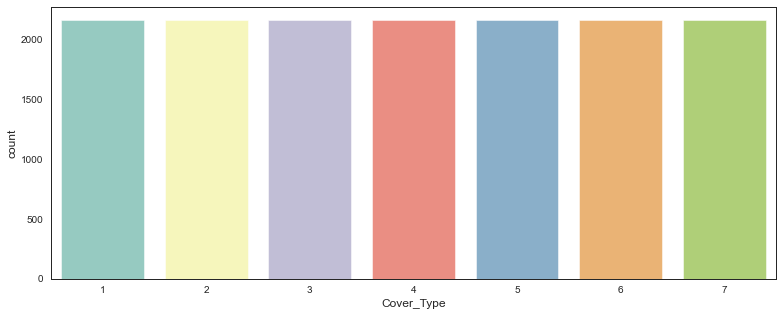

In [9]:
target_var = train_data['Cover_Type']
sns.countplot(target_var, palette='Set3')

So, our target variable has a uniform distribution. Each class is represented equally.

## 2.4 Plot numerical distributions

Knowledge about how the numerical values are distributed can give us insights for potential problems in data (like skewness, measurement errors) and the main tendecies in our features (what kinds of values appear the most, etc.).

Concretely, we should look for this things:

##### 1. Unexpected distributions
##### 2. Potential outliers that doesn't make sense
##### 3. Features that should be binary
##### 4. Boundaries that don't make sense
##### 5. Potential mesaurement errors

In [10]:
#Getting names of the numerical features, dropping the 'Id' variable
num_cols = train_data.columns[1:11]
print(num_cols)
print('-' * 90)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
------------------------------------------------------------------------------------------


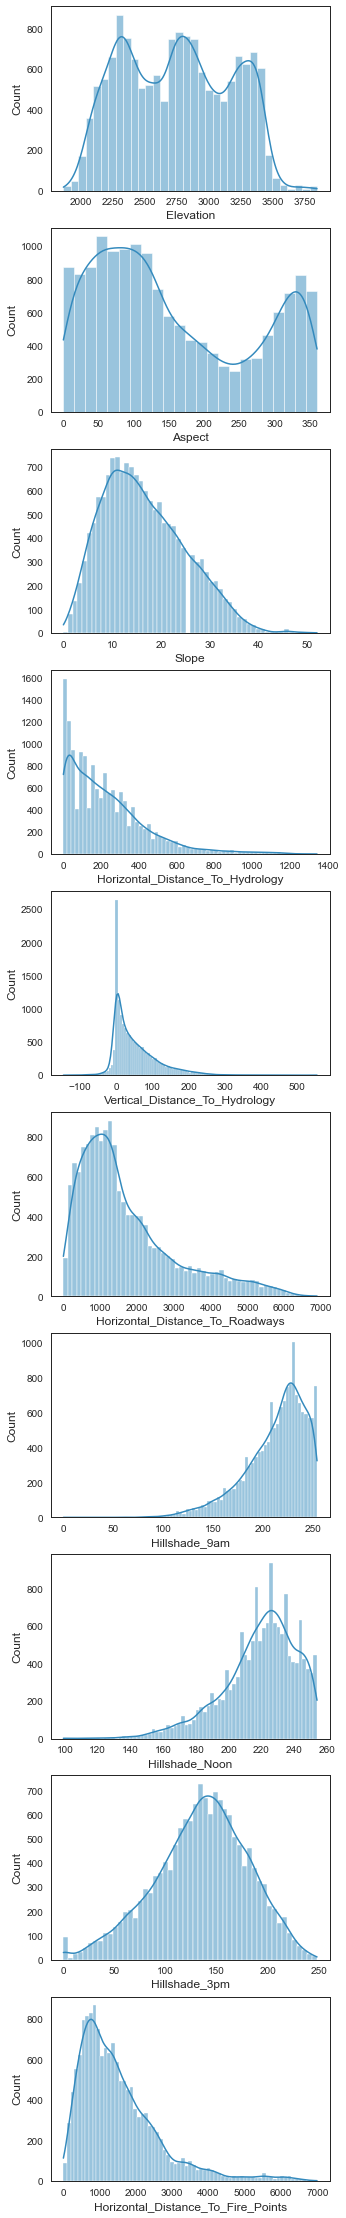

In [11]:
#Configuring visualization parameters (creating subplots and estimating the size of graphs)
figure, axes = plt.subplots(10, 1, figsize=(5, 40))

#Preparing the parameters for Seaborn graphs
params = []

for i in range(10):
    graph = {}
    graph['data'] = train_data
    graph['x'] = num_cols[i]
    graph['ax'] = axes[i]
    graph['kde'] = True
    params.append(graph)

#Plotting the histograms
for i in range(10):
    sns.histplot(**params[i])

Here is the observations:

1. There is obvious bimodality in distribution of 'Elevation' feature. We've got two equal 'peaks' in it, and one 'peak' that is lower.
    In the 'Aspect' feature, we've got 2 'peaks', one on the left, and second on the right, which is smaller (lower).
    'Horizontal_Distance_To_Hidrology' is strongly skewed on the left and has a lot of 0 values. 'Vertical_Distance_To_Hidrology' is also skewed on the left and has even more 0 values.
2. What about the rest of the distributions, all of them are closer to normal distribution than ones mentioned earlier. 'Horizontal_Distance_To_Roadways' and 'Horizontal_Distance_To_Fire_Points' are skewed on the left, 'Hillshade_9am' and 'Hillshade_Noon' are skewed on the right. And distribution of 'Hillshade_3pm' is the closest to normal.
3. I didn't see any of potential outliers that doesn't make sense or boundaries or features that should be binary. Measurement errors are also unlikely to appear.

To discover how closely is each distribution to normal, we can measure skewness and kurtosis.

In [12]:
skewness = []
kurtosis = []
for col in num_cols:
    skewness.append(train_data[col].skew())
    kurtosis.append(train_data[col].kurt())

s_k_dict = {'Skewness':skewness, 'Kurtosis':kurtosis}
s_k = pd.DataFrame(data=s_k_dict, index=num_cols)
s_k.head(10)

,Skewness,Kurtosis
Elevation,0.075640,-1.082116
Aspect,0.450935,-1.150244
Slope,0.523658,-0.238310
Horizontal_Distance_To_Hydrology,1.488052,2.803984
Vertical_Distance_To_Hydrology,1.537776,3.403499
Horizontal_Distance_To_Roadways,1.247811,1.022419
Hillshade_9am,-1.093681,1.218810
Hillshade_Noon,-0.953232,1.153484
Hillshade_3pm,-0.340827,-0.087344
Horizontal_Distance_To_Fire_Points,1.617099,3.385416


So, as I mentioned earlier, 'Hillshade_3pm' distribution is the closest to normal distribution with almost no kurtosis and the lowest skewness.

Also, there are three features ('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points') that have quite high skewness and kurtosis and we should deal with it in further steps. 

## 2.5 Plot categorical distributions

Categorical features cannot be visualized through histograms. Instead, we can use bar plots.

In particular, we will want to look for sparse classes, which are classes that have a very small number of observations.

Sparse classes tend to be problematic when building models.

In the best case, the don't influence the model much
In the worst case, the can cause the model to be overfit

For convenient plotting, we will create new variables 'wilderness_area' and 'soil_type'. In short, we will unite the data in the binary columns in one column. The values in 'wilderness_area' column will be 1 for 1st area, 2 for 2nd, 3 for 3rd and so on; same with the 'soil_type' column.

In [13]:
train_data['wilderness_area'] = train_data['Wilderness_Area1'] * 1 + train_data['Wilderness_Area2'] * 2 + train_data['Wilderness_Area3'] * 3 + train_data['Wilderness_Area4'] * 4

train_data['soil_type'] = train_data['Soil_Type1'] * 1
for i in range(2 , 41):
    train_data['soil_type'] = train_data['soil_type'] + train_data['Soil_Type' + str(i)] * i

In [14]:
train_data.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,wilderness_area,soil_type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,12
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,30
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,29
6,7,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
7,8,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
8,9,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29
9,10,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,29


Plotting the categorical variables:

### 2.5.1 Wilderness area

<AxesSubplot:xlabel='wilderness_area', ylabel='Count'>

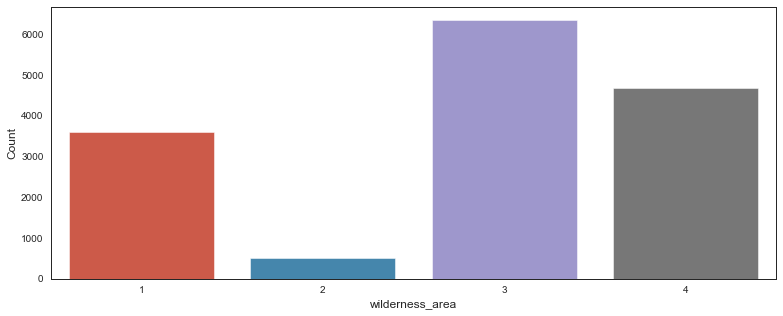

In [30]:
wilderness_area = pd.DataFrame(train_data['wilderness_area'].value_counts().index, columns=['wilderness_area'])
count = pd.DataFrame(train_data['wilderness_area'].value_counts().values, columns=['Count'])
w_data = pd.concat([wilderness_area, count], axis=1)
sns.barplot(x='wilderness_area', y='Count', data=w_data)

### 2.5.2 Soil type

<AxesSubplot:xlabel='soil_type', ylabel='Count'>

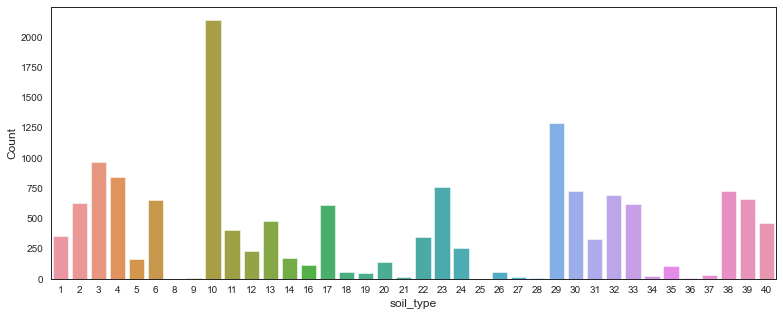

In [31]:
soil_type = pd.DataFrame(train_data['soil_type'].value_counts().index, columns=['soil_type'])
count = pd.DataFrame(train_data['soil_type'].value_counts().values, columns=['Count'])
s_data = pd.concat([soil_type, count], axis=1)
sns.barplot(x='soil_type', y='Count', data=s_data)

The conclusions we can make after looking at plots:

1. The second class in wilderness areas has lower number of entrancies than the others. Maybe, we should think about the union of this class and some other class.
2. There is a number of classes in 'soil type' variable that seem to be sparse. Specifically, 8, 9, 18, 19, 21, 25, 26, 27, 28, 34, 36, 37. We should look at variables description on Kaggle and decide what to do with this classes.

Also, we can look at the exact numbers of entrancies of each of these classes

In [45]:
sparse_classes = [8, 9, 18, 19, 21, 25, 26, 27, 28, 34, 36, 37]
values = []
percentages = []
for cls in sparse_classes:
    series = train_data[train_data['soil_type'] == cls]['soil_type'].value_counts()
    value = series.values
    percentage = series.values / train_data.shape[0]
    values.append(value)
    percentages.append(percentage)


sparse_classes = pd.concat([
    pd.DataFrame(values, index=sparse_classes, columns=['Total']).T,
    pd.DataFrame(percentages, index=sparse_classes, columns=['Percentage']).T
])
sparse_classes

,8,9,18,19,21,25,26,27,28,34,36,37
Total,1.000000,10.000000,60.000000,46.000000,16.000000,1.000000,54.000000,15.000000,9.000000,22.000000,10.000000,34.000000
Percentage,0.000066,0.000661,0.003968,0.003042,0.001058,0.000066,0.003571,0.000992,0.000595,0.001455,0.000661,0.002249


## 2.6 Plot segmentations

We will plot segmentations to observe the relationships between numerical features and target variable.
To do so we will use boxplots.

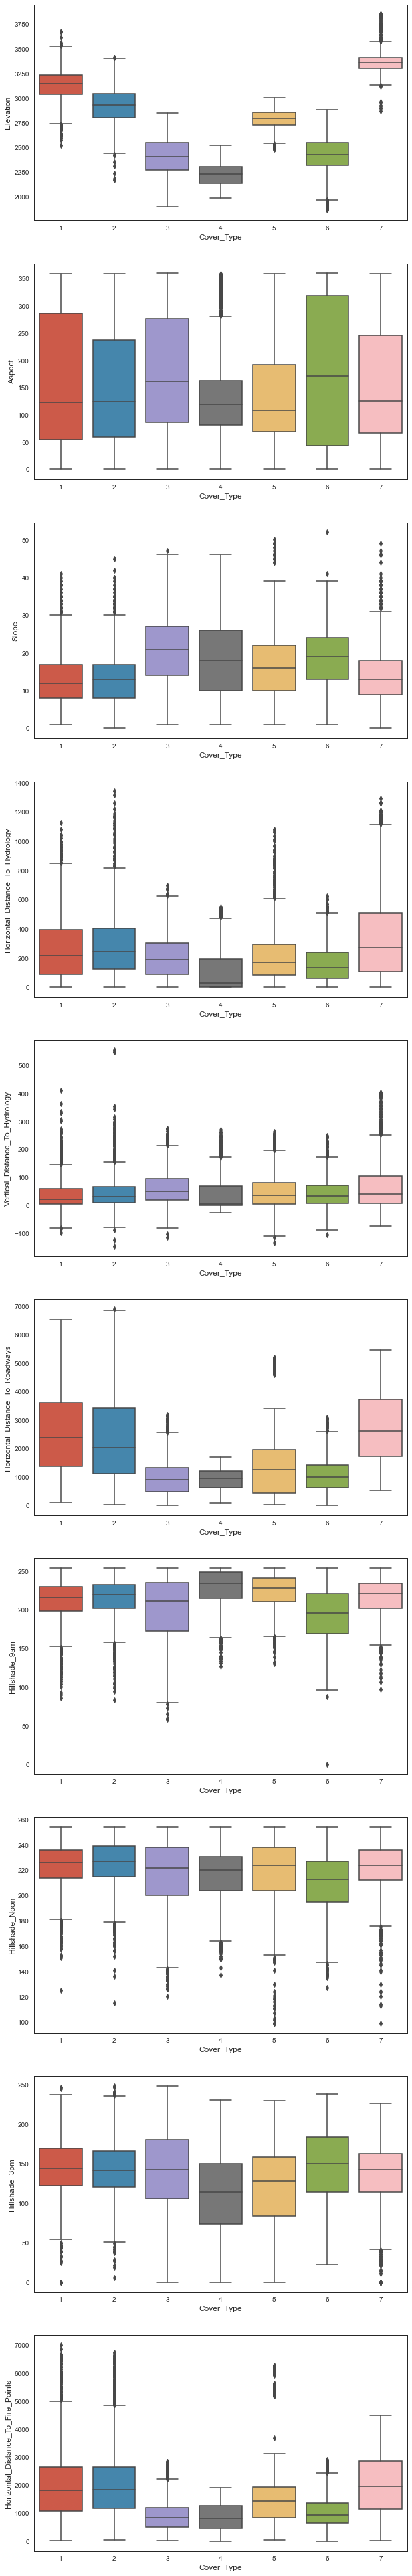

In [46]:
figure, axes = plt.subplots(10, 1, figsize=(10, 70))

params = []

for i in range(10):
    graph = {}
    graph['data'] = train_data
    graph['x'] = 'Cover_Type'
    graph['y'] = num_cols[i]
    graph['ax'] = axes[i]
    params.append(graph)

#Plotting the histograms
for i in range(10):
    sns.boxplot(**params[i])

The conclusions we can make after looking at plots:

1. There are two pairs of classes that can cause problems in the future. First pair is the 1st and 2nd classes, second pair is the 3rd and 6th classes. The problem is the samples assigned to these classes have almost same distributions of all numerical values. Some significant differences only exist in the case of 'Elevation' and 'Aspect' features. These features can help the model to distinguish one class from the other (others).
2. On the other hand, samples assigned to 4th and 7th classes have quite unique distributions compared to others. Most likely, this won't be a big problem for model to distinguish these classes from the others. 

## 2.7 Study correlations

Correlations is one of the best approaches to examine the relations between the numerical variables. Looking at correlations can give as valuable insights for Feature Engineering (which variables could be added, transformed, or deleted).

In [47]:
train_num = train_data[num_cols]
train_num.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


<AxesSubplot:>

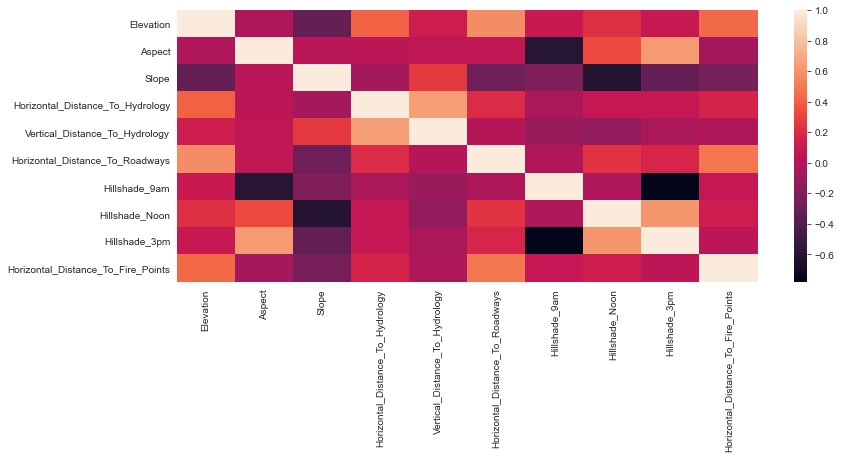

In [48]:
corr_m = train_num.corr()
sns.heatmap(corr_m)

Conclusions:
1. Both Hillshade_9am and Hillshade_Noon are highly correlated with Hillshade_3pm. It can be the sign of multicollinearity.
2. 'Hillshade' variables are correlated with Aspect and Slope (which is expected due to the nature of these variables).
3. Horizontal_Distance_To_Hidrology and Vetical_Distance_To_Hidrology are highly correlated with each other, it can be useful in Feature Engineering.
4. Elevation is correlated to 'Horizontal_Distance' variables.
5. Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_points are highly correlated (that doesn't make sense for now).

## 2.8 Study relations between categorical variables

We will use the bar plots and cross tables to study relations between categorical features and target variable.

### 2.8.1 Relations between wilderness_area and Cover_Type

In [49]:
cat_cols = train_data.columns[55:]
wilderness = cat_cols[1]
soil = cat_cols[2]
target = cat_cols[0]

cover = train_data[target].value_counts().index
val = train_data[target].value_counts().values


<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

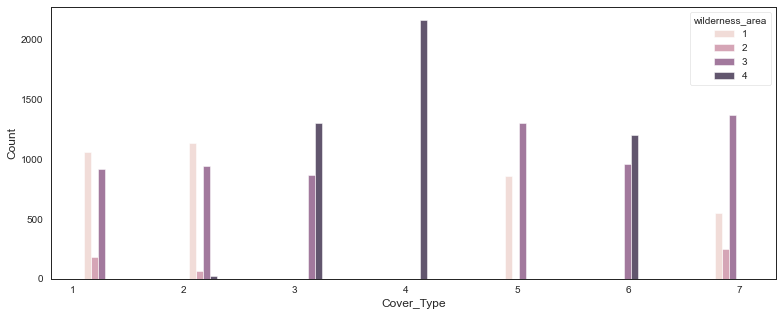

In [53]:
sns.histplot(data=train_data, x='Cover_Type', hue='wilderness_area', multiple='dodge', shrink=.8)

Here we can observe the tendency we saw before. The pair of 1st and 2nd classes and the pair of 3rd and 6th classes have quite similiar wilderness areas. 
However, 4th class has only 4th wilderness area. 

### 2.8.2 Relations between soil_type and Cover_Type

<AxesSubplot:xlabel='Cover_Type', ylabel='Count'>

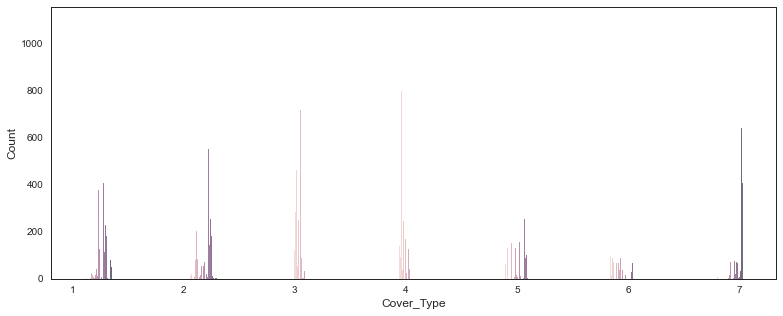

In [54]:
sns.histplot(data=train_data, x='Cover_Type', hue='soil_type', multiple='dodge', shrink=.8, legend=False)

Here we can observe that samples assigned to 1st and 2nd classes have small differencies, but 3rd and 6th are easier to distinguish.

In [56]:
pd.crosstab(train_data['Cover_Type'], train_data['wilderness_area'])

wilderness_area,1,2,3,4
Cover_Type,,,,
1,1062,181,917,0
2,1134,66,940,20
3,0,0,863,1297
4,0,0,0,2160
5,856,0,1304,0
6,0,0,962,1198
7,545,252,1363,0


In [57]:
pd.crosstab(train_data['Cover_Type'], train_data['soil_type'])

soil_type,1,2,3,4,5,6,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,24,17,0,9,2,0,15,41,12,275,376,128,0,7,7,0,407,81,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,203,84,0,14,7,16,13,55,0,54,149,72,1,19,5,6,554,144,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,0,4,4,5,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,0,0,128,40,350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,0,305,0,9,131,44,18,6,0,0,157,11,0,28,0,3,254,480,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,0,66,37,37,88,0,0,37,0,0,3,15,0,0,0,0,0,0,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,72,31,0,0,3,0,76,20,27,70,67,4,98,8,34,641,575,407


## 2.9 Summary

1. We have enough observations to analyse and build a model (15120 observations is the normal size for a dataset).
2. We have 56 features (55 independent features and 1 target variable(categorical)). Concretely, there are 11 numerical and 45 categorical features.
3. We've got negative values in some features. It may cause problems on the model building step so we should think how to handle this.
4. We had no missing data at all in our dataset.
5. Our target variable distributed evenly (all of the classes have the equal number of observations).
6. We've got bimodal distribution in one of the numerical variables, which may cause problems. Also, we've got a number of distributions, that are skewed in the left or in the right. Maybe we should apply transformations to them.
7. What about our categorical features, we've seen that second type of 'wilderness_area' occurs more rarely than others. Also, we've got some sparse classes in 'soil_type' variable. Maybe we should unite some classes with each other.
8. Exploring relations between numerical features and target variable, we discovered the classes that maybe difficult to distinguish. Concretely, two pairs: 1st and 2nd, and 3rd and 6th. However, some of the variables give us opportunity to distinguish this classes from each other (Elevation, Aspect and some others). But also we've got a classes, that should be easy for prediction, 4th and 7th.
9. Exploring correlations between numerical variables, we discovered interesting facts. Firstly, there is possible multicollinearity between 'Hillshade' features. Concretely, Hillshade_3pm has strong positive correlation (0.614) with Hillshade Noon and strong negative correlation with Hillshade 9am (-0.7799). Maybe, Hillshade_3pm should be droped from the analysis. Secondly, there is strong positive correlation (0.65) between Horizontal_Distance_To_Hidrology and Vertical_Distance_To_Hidrology. It could be useful for futher Feature Engineering. Thirdly, we have the huge correlation between horizontal distances to roadways and fire points (0.486) and between horizontal distances and elevation (0.578 in case of Roadways, 0.443 in case of fire points, 0.412 in case of hidrology). Fourthly, we've got huge correlation between both Slope and Aspect variables and 'Hillshade' variables.
10. Exploring the relations between categorical variables didn't give us that much, but we discovered something. Firstly, the samples assigned to 4th class have only 4th type of wilderness area, which make this class a lot more easier to distinguish from others. The 'soil_type' variable could give us an opportunity to distinguish the 3rd class from the 6th class.

Our second step is data cleaning!

# 3. Data Cleaning